In [387]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

## Set Plot Parameters
sns.set(color_codes=True)        
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 7))
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=19, titlepad=8)
plot_params = dict(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", legend=False)

In [389]:
path='../input/store-sales-time-series-forecasting/'  ## Path of datasets

## Train & Test Datasets
train=pd.read_csv(path+'train.csv',parse_dates=['date'])
test=pd.read_csv(path+'test.csv',parse_dates=['date'])

## Supplementary Datasets
oil=pd.read_csv(path+'oil.csv',parse_dates=['date'])
holidays_events=pd.read_csv(path+'holidays_events.csv',parse_dates=['date'])
stores=pd.read_csv(path+'stores.csv')
transactions=pd.read_csv(path+'transactions.csv',parse_dates=['date'])

In [390]:
display(train.head())
display(train.info())

def info(dataset):
    
    """ This defination is to print most valuable information
        about dataset columns.
        Input: dataset
        Output: dataset columns information
    """
    for column in dataset.columns:
        print('==========%s =========='%column)
        print('Type is: ',dataset[column].dtype)
        print(dataset[column].value_counts())
        print('Number of unique values: ',dataset[column].nunique())
        print('Number of null values: ',dataset[column].isna().sum())

info(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

==========id ==========
Type is:  int64
0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64
Number of unique values:  3000888
Number of null values:  0
==========date ==========
Type is:  datetime64[ns]
2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64
Number of unique values:  1684
Number of null values:  0
==========store_nbr ==========
Type is:  int64
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35

In [391]:
display(train.head())
display(train.info())

def info(dataset):
    
    """ This defination is to print most valuable information
        about dataset columns.
        Input: dataset
        Output: dataset columns information
    """
    for column in dataset.columns:
        print('==========%s =========='%column)
        print('Type is: ',dataset[column].dtype)
        print(dataset[column].value_counts())
        print('Number of unique values: ',dataset[column].nunique())
        print('Number of null values: ',dataset[column].isna().sum())

info(train)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


None

==========id ==========
Type is:  int64
0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64
Number of unique values:  3000888
Number of null values:  0
==========date ==========
Type is:  datetime64[ns]
2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64
Number of unique values:  1684
Number of null values:  0
==========store_nbr ==========
Type is:  int64
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35

## Train Data

In [392]:
print(train.shape)
display(train.describe())
display(train.describe(include="object"))

(3000888, 6)


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


,family
count,3000888
unique,33
top,AUTOMOTIVE
freq,90936


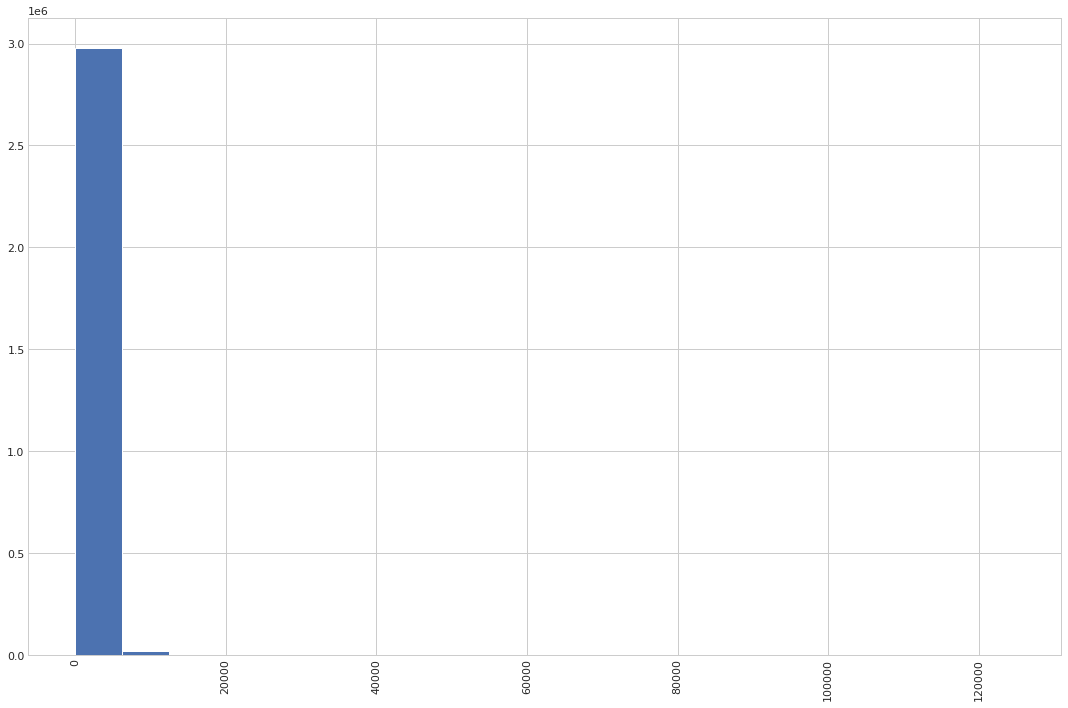

In [393]:
plt.figure(figsize=(15,10))
plt.hist(train["sales"], bins=20)
plt.xticks(rotation=90)
plt.show()

In [394]:
display(train[train["sales"]>20000].describe().applymap(lambda x: format(x,"f")))
display(train[train["sales"]>20000].describe(include="object"))

,id,store_nbr,sales,onpromotion
count,106.000000,106.000000,106.000000,106.000000
mean,2192760.424528,38.452830,27553.002972,46.915094
std,628981.077998,13.186669,15563.177089,36.994238
min,79674.000000,2.000000,20011.000000,0.000000
25%,1975334.250000,35.000000,20965.500000,19.000000
50%,2269785.000000,44.000000,21880.000000,39.500000
75%,2616897.000000,46.000000,25977.750000,64.000000
max,2921997.000000,49.000000,124717.000000,150.000000


,family
count,106
unique,3
top,GROCERY I
freq,88


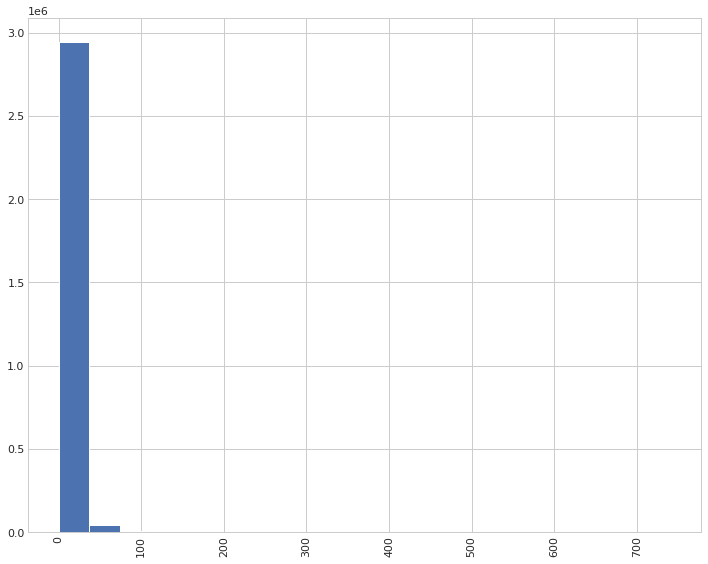

In [395]:
plt.figure(figsize=(10,8))
plt.hist(train["onpromotion"], bins=20)
plt.xticks(rotation=90)
plt.show()

In [396]:
test["date"].value_counts()

2017-08-16    1782
2017-08-17    1782
2017-08-18    1782
2017-08-19    1782
2017-08-20    1782
2017-08-21    1782
2017-08-22    1782
2017-08-23    1782
2017-08-24    1782
2017-08-25    1782
2017-08-26    1782
2017-08-27    1782
2017-08-28    1782
2017-08-29    1782
2017-08-30    1782
2017-08-31    1782
Name: date, dtype: int64

In [397]:
date_count = pd.DataFrame(train["date"].value_counts())
date_count[date_count["date"] != 1782]

,date


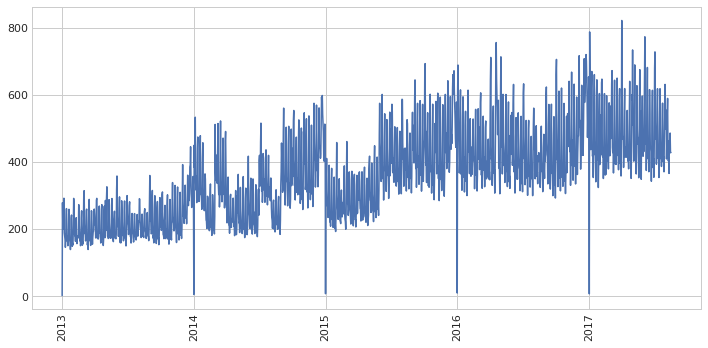

In [398]:
group_train = train.groupby("date", as_index=False).mean().sort_values("date")
plt.figure(figsize=(10,5))
plt.plot(group_train["date"], group_train["sales"])
plt.xticks(rotation=90)
plt.show()

In [399]:
group_train

,date,id,store_nbr,sales,onpromotion
0,2013-01-01,890.5,27.5,1.409438,0.000000
1,2013-01-02,2672.5,27.5,278.390807,0.000000
2,2013-01-03,4454.5,27.5,202.840197,0.000000
3,2013-01-04,6236.5,27.5,198.911154,0.000000
4,2013-01-05,8018.5,27.5,267.873244,0.000000
...,...,...,...,...,...
1679,2017-08-11,2992868.5,27.5,463.733851,7.956790
1680,2017-08-12,2994650.5,27.5,444.798280,4.664422
1681,2017-08-13,2996432.5,27.5,485.768618,5.209315
1682,2017-08-14,2998214.5,27.5,427.004717,4.513468


In [400]:
group_train[group_train["sales"]<100]

,date,id,store_nbr,sales,onpromotion
0,2013-01-01,890.5,27.5,1.409438,0.000000
364,2014-01-01,649538.5,27.5,4.827197,0.000000
728,2015-01-01,1298186.5,27.5,7.168135,0.006734
1092,2016-01-01,1946834.5,27.5,9.221882,0.089226
1457,2017-01-01,2597264.5,27.5,6.780304,0.095398


<StemContainer object of 3 artists>

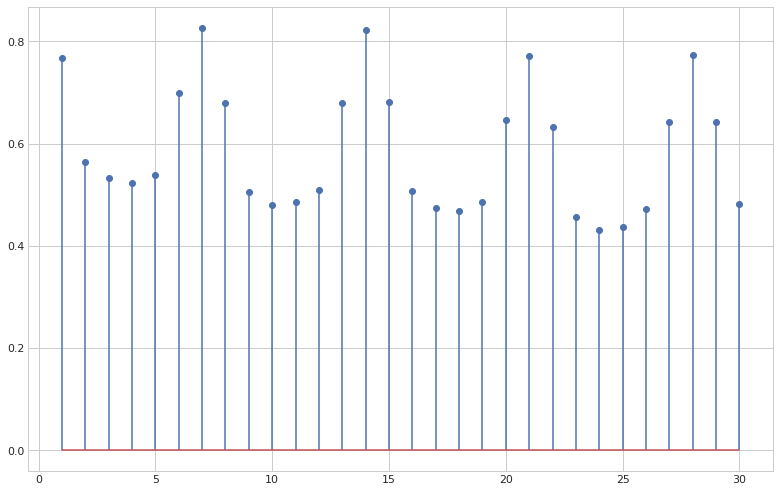

In [401]:
# Let's check correlation.
corr_lst = []
lag_range = 30

for i in range(1, lag_range+1):
    lag = group_train.shift(i).iloc[i:,:]
    corr = group_train.loc[0:len(group_train)-i-1,"sales"].corr(lag["sales"])
    corr_lst.append(corr)
    
plt.stem(np.arange(1, lag_range+1), corr_lst, use_line_collection=True)

In [402]:
## holiday data


In [403]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [404]:
holidays_events.describe(include="object")

,type,locale,locale_name,description
count,350,350,350,350
unique,6,3,24,103
top,Holiday,National,Ecuador,Carnaval
freq,221,174,174,10


In [405]:
# Traveling on holidays
holidays_events.iloc[264:266,:]


,date,type,locale,locale_name,description,transferred
264,2016-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False


In [406]:
print(holidays_events["type"].unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [407]:
# locale_name
local = holidays_events[holidays_events["locale"]=="Local"]
regional = holidays_events[holidays_events["locale"]=="Regional"]
national = holidays_events[holidays_events["locale"]=="National"]
print("Local")
print(local["locale_name"].unique())
print("Regional")
print(regional["locale_name"].unique())
print("National")
print(national["locale_name"].unique())

Local
['Manta' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda' 'Latacunga'
 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe' 'Esmeraldas' 'Ambato'
 'Ibarra' 'Quevedo' 'Quito' 'Loja' 'Salinas' 'Guayaquil']
Regional
['Cotopaxi' 'Imbabura' 'Santo Domingo de los Tsachilas' 'Santa Elena']
National
['Ecuador']


In [408]:
# transactions

In [409]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


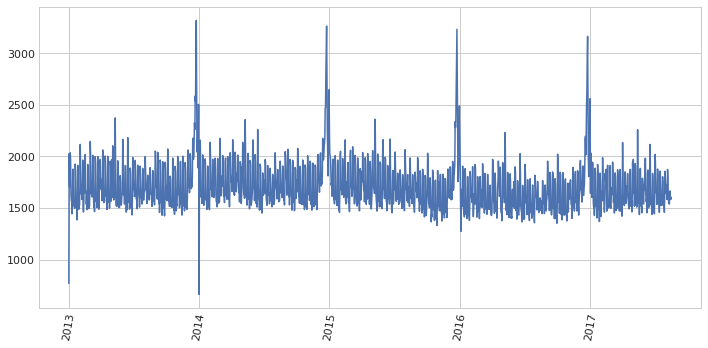

In [410]:
group_trans = transactions.groupby("date", as_index=False).mean()

plt.figure(figsize=(10,5))
plt.plot(group_trans["date"], group_trans["transactions"])
plt.xticks(rotation=80)
plt.show()

In [411]:
display(group_trans[group_trans["transactions"]<1200])
display(group_trans[group_trans["transactions"]>2300])

,date,store_nbr,transactions
0,2013-01-01,25.0,770.0
364,2014-01-01,30.5,663.5


,date,store_nbr,transactions
130,2013-05-11,26.510638,2372.000000
352,2013-12-19,26.510638,2324.829787
354,2013-12-21,26.510638,2583.510638
355,2013-12-22,26.510638,2531.851064
356,2013-12-23,26.510638,3103.744681
357,2013-12-24,26.510638,3315.872340
362,2013-12-30,26.510638,2503.085106
363,2013-12-31,26.510638,2493.914894
493,2014-05-10,26.565217,2355.260870
717,2014-12-20,27.062500,2464.437500


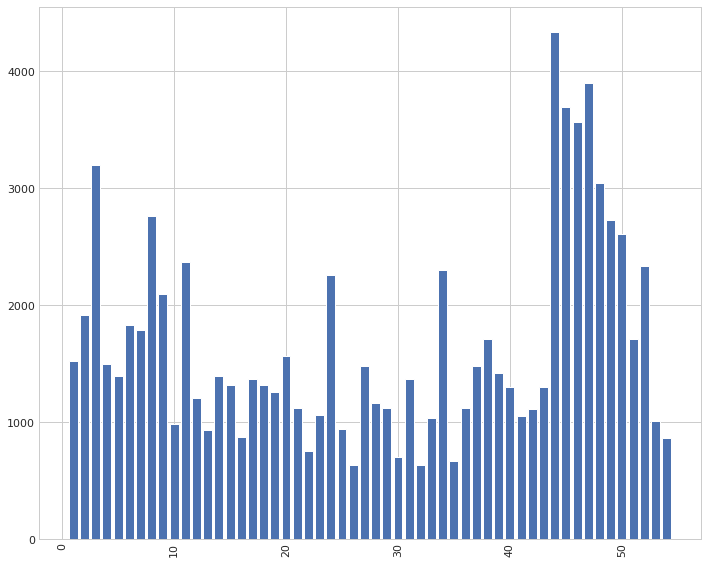

In [412]:
group_trans = transactions.groupby("store_nbr", as_index=False).mean()

plt.figure(figsize=(10,8))
plt.bar(group_trans["store_nbr"], group_trans["transactions"])
plt.xticks(rotation=90)
plt.show()

In [413]:
# oil data¶

In [414]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


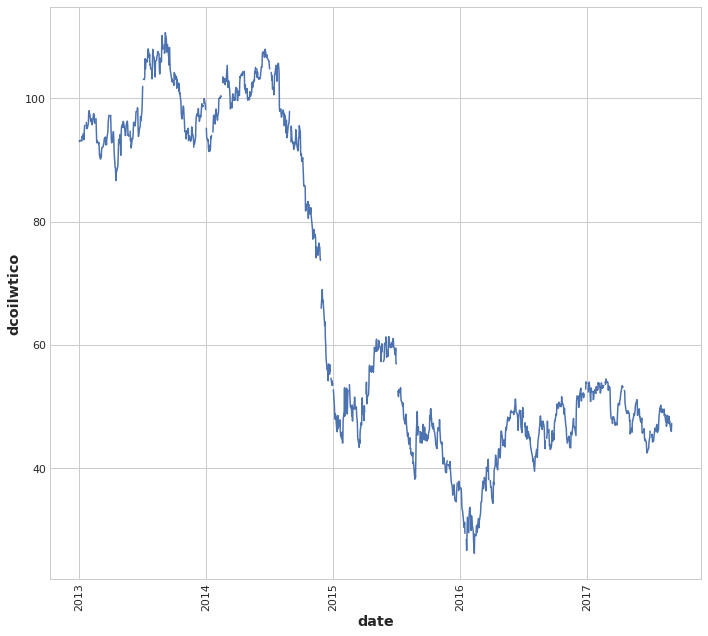

In [415]:
fig, ax = plt.subplots(figsize=(10,9))
ax.plot(oil["date"], oil["dcoilwtico"])
plt.xticks(rotation=90)
ax.set_xlabel("date")
ax.set_ylabel("dcoilwtico")
plt.show()

In [416]:
oil[oil["dcoilwtico"].isnull()]["date"].unique()

array(['2013-01-01T00:00:00.000000000', '2013-01-21T00:00:00.000000000',
       '2013-02-18T00:00:00.000000000', '2013-03-29T00:00:00.000000000',
       '2013-05-27T00:00:00.000000000', '2013-07-04T00:00:00.000000000',
       '2013-09-02T00:00:00.000000000', '2013-11-28T00:00:00.000000000',
       '2013-12-25T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-01-20T00:00:00.000000000', '2014-02-17T00:00:00.000000000',
       '2014-04-18T00:00:00.000000000', '2014-05-26T00:00:00.000000000',
       '2014-07-04T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-11-27T00:00:00.000000000', '2014-12-25T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-01-19T00:00:00.000000000',
       '2015-02-16T00:00:00.000000000', '2015-04-03T00:00:00.000000000',
       '2015-05-25T00:00:00.000000000', '2015-07-03T00:00:00.000000000',
       '2015-09-07T00:00:00.000000000', '2015-11-26T00:00:00.000000000',
       '2015-12-25T00:00:00.000000000', '2016-01-01

In [417]:
oil_fillna = oil.fillna(method="ffill", limit=2)
oil_fillna.loc[0, "dcoilwtico"] = oil_fillna.loc[1, "dcoilwtico"].copy()
oil_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


<StemContainer object of 3 artists>

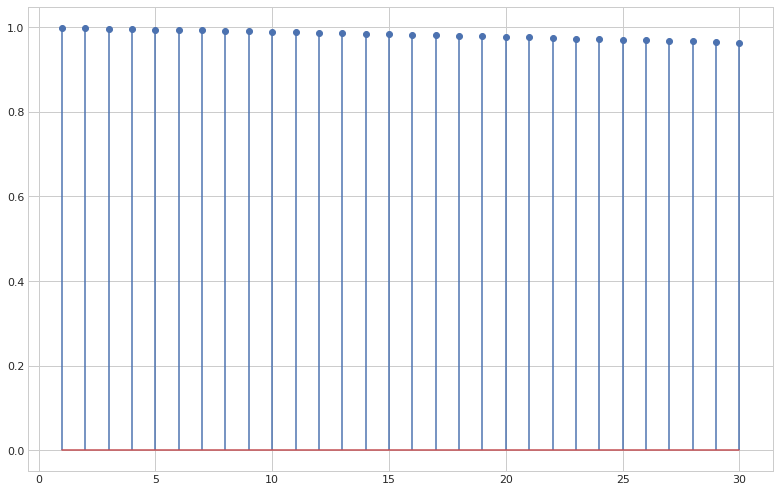

In [418]:
corr_lst = []
lag_range = 30

for i in range(1, lag_range+1):
    lag = oil_fillna.shift(i).iloc[i:,:]
    corr = oil_fillna.loc[0:len(oil_fillna)-i-1,"dcoilwtico"].corr(lag["dcoilwtico"])
    corr_lst.append(corr)
    
plt.stem(np.arange(1, lag_range+1), corr_lst, use_line_collection=True)

### stores data¶


In [419]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [420]:
display(stores.describe().T)
display(stores.describe(include="object").T)

,count,mean,std,min,25%,50%,75%,max
store_nbr,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
cluster,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


,count,unique,top,freq
city,54,22,Quito,18
state,54,16,Pichincha,19
type,54,5,D,18


### Merging train data with other data


In [421]:
display(holidays_events.iloc[264:266,:])
holidays_events.drop(264, axis=0, inplace=True)
display(holidays_events.iloc[264:266,:])

stores = stores.rename(columns={"type": "store_type"})
holidays = holidays_events.rename(columns={"locale_name":"city", "type":"holiday_type"})

,date,type,locale,locale_name,description,transferred
264,2016-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False


,date,type,locale,locale_name,description,transferred
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True


In [422]:
data = pd.merge(train, stores, on="store_nbr", how="left")
data = pd.merge(data, transactions, on=["date", "store_nbr"], how="left")
data = pd.merge(data, oil, on="date", how="left")
data = pd.merge(data, holidays, on=["date", "city"], how="left")

In [423]:
display(data.shape)
data.head()

(3000888, 16)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   store_type    object        
 9   cluster       int64         
 10  transactions  float64       
 11  dcoilwtico    float64       
 12  holiday_type  object        
 13  locale        object        
 14  description   object        
 15  transferred   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 389.2+ MB


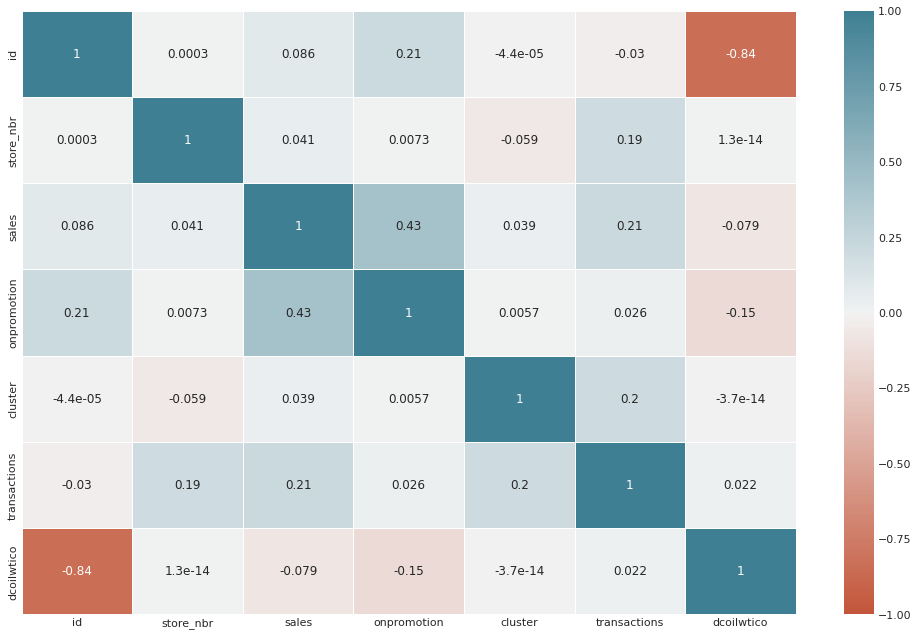

In [425]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

We can see that most correlated values are sales and onpromotion. It is fallowed by sales and transactions.

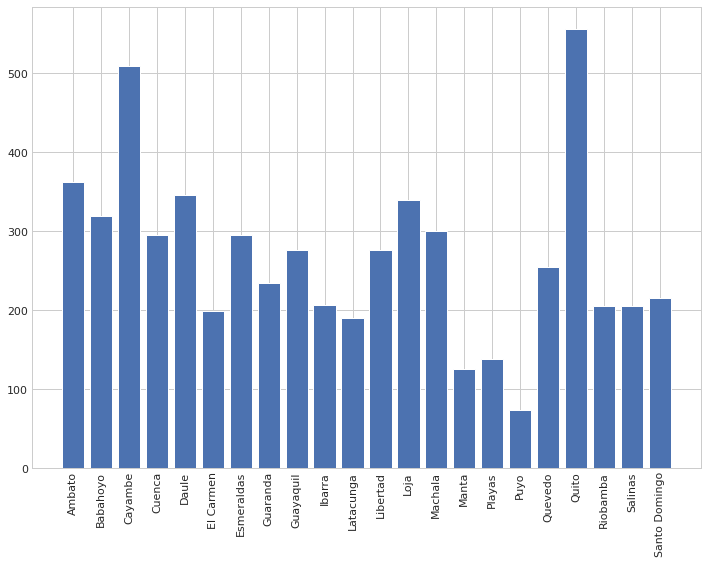

In [426]:
group_city = data.groupby("city", as_index=False).mean()
plt.figure(figsize=(10,8))
plt.bar(group_city["city"], group_city["sales"])
plt.xticks(rotation=90)
plt.show()

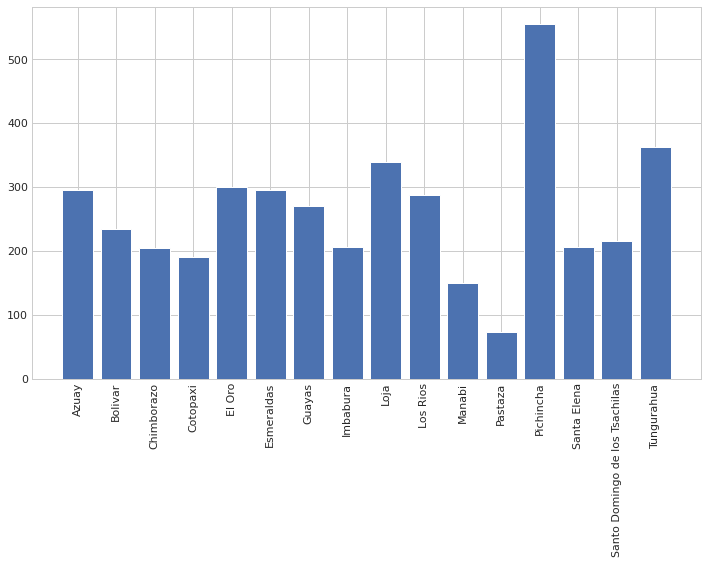

In [427]:
group_state = data.groupby("state", as_index=False).mean()
plt.figure(figsize=(10,8))
plt.bar(group_state["state"], group_state["sales"])
plt.xticks(rotation=90)
plt.show()


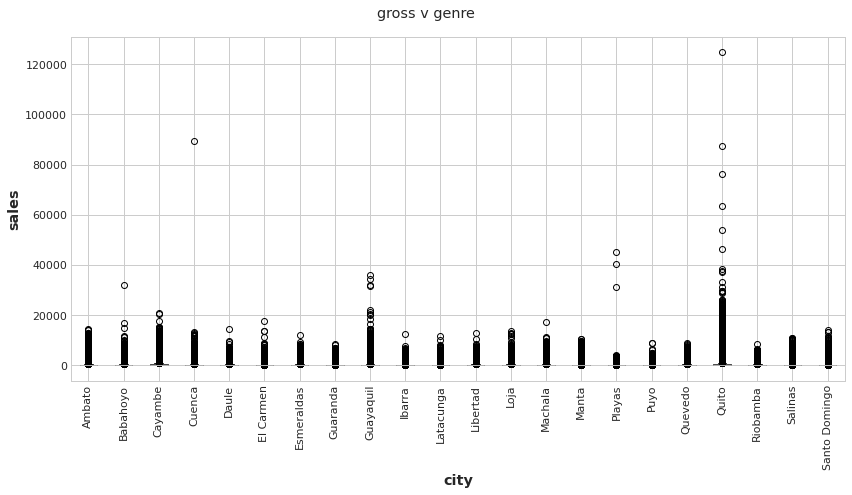

In [428]:
# Let's check how genre affects the gross of a movie.
ig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('sales', 'city', ax=ax)
plt.suptitle('gross v genre')
plt.title('')
plt.ylabel('sales')
plt.xticks(rotation=90)
plt.show()

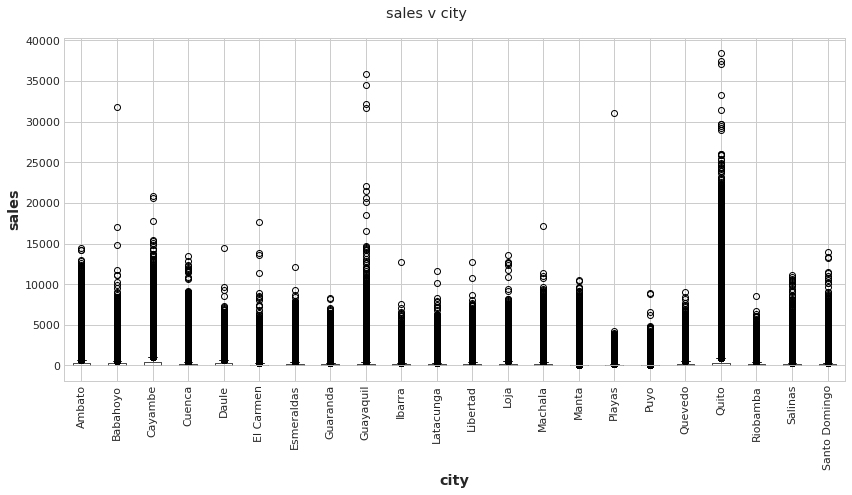

In [429]:
data = data[data["sales"] <= 40000]
ig, ax = plt.subplots(1,1, figsize=(12, 7))
data.boxplot('sales', 'city', ax=ax)
plt.suptitle('sales v city')
plt.title('')
plt.ylabel('sales')
plt.xticks(rotation=90)
plt.show()

## MODEL DEVELOPMENT

In [430]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [431]:
df_train = pd.read_csv("../input/store-sales-time-series-forecasting/train.csv",
                       usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,)
df_train.head()

,date,store_nbr,family,sales
0,2013-01-01,1,AUTOMOTIVE,0.0
1,2013-01-01,1,BABY CARE,0.0
2,2013-01-01,1,BEAUTY,0.0
3,2013-01-01,1,BEVERAGES,0.0
4,2013-01-01,1,BOOKS,0.0


In [432]:
df_train['date'] = df_train.date.dt.to_period('D')

In [433]:
df_train = df_train.set_index(['store_nbr','family','date']).sort_index()

In [434]:
df_train.shape


(3000888, 1)

In [435]:
df_train.head()

sales
store_nbr family     date             
1         AUTOMOTIVE 2013-01-01    0.0
                     2013-01-02    2.0
                     2013-01-03    3.0
                     2013-01-04    3.0
                     2013-01-05    5.0

<AxesSubplot:xlabel='date'>

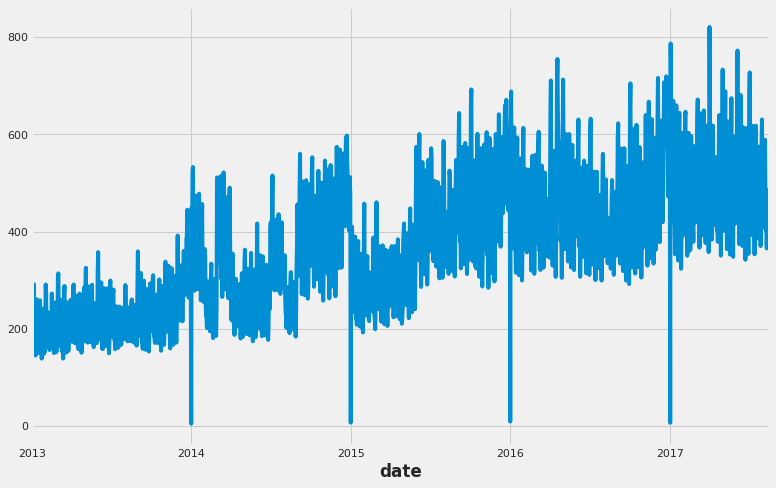

In [436]:
avarage_sales = df_train.groupby('date').mean().squeeze()
avarage_sales.plot()

In [437]:
avarage_sales = (
    df_train
    .groupby('date').mean()
    .squeeze().loc['2017']
)

In [438]:
y = df_train.unstack(['store_nbr','family']).loc['2017']

In [439]:
fourier = CalendarFourier(freq ="M",order=12)

dp = DeterministicProcess(
index=y.index,
constant=True,
order=1,
additional_terms=[fourier],
drop=True
)
X= dp.in_sample()
X['NewYear'] = X.index.dayofyear ==1

In [440]:
X.head()

,const,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)",...,"cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)",NewYear
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,True
2017-01-02,1.0,2.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,...,-0.050649,0.968077,-0.250653,0.897805,-0.440394,0.790776,-0.612106,0.651372,-0.758758,False
2017-01-03,1.0,3.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649,...,-0.994869,-0.485302,-0.874347,-0.790776,-0.612106,-0.968077,-0.250653,-0.988468,0.151428,False
2017-01-04,1.0,4.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758,...,0.151428,-0.724793,0.688967,-0.201299,0.979530,0.394356,0.918958,0.848644,0.528964,False
2017-01-05,1.0,5.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869,...,0.979530,0.848644,0.528964,0.968077,-0.250653,0.485302,-0.874347,-0.299363,-0.954139,False


In [441]:
model_rf = RandomForestRegressor(n_estimators=250,random_state=2022, verbose=0)

model_rf.fit(X, y)

RandomForestRegressor(n_estimators=250, random_state=2022)

In [442]:
y_pred = pd.DataFrame(model_rf.predict(X), index=X.index, columns=y.columns)


In [443]:
df_test = pd.read_csv(
    '../input/store-sales-time-series-forecasting/test.csv',
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_test['date'] = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

# Create features for test set
X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)

In [444]:
y_submit_rf = pd.DataFrame(model_rf.predict(X_test), index=X_test.index, columns=y.columns)
y_submit_rf= y_submit_rf.stack(['store_nbr', 'family'])
y_submit_rf = y_submit_rf.join(df_test.id).reindex(columns=['id', 'sales'])
y_submit_rf.to_csv('submission.csv', index=False)